# HSE 2024: Mathematical Methods for Data Analysis

## Homework 2

# Attention!

* For tasks where <ins>text answer</ins> is required **Russian language** is **allowed**.
* If a task asks you to describe something (make coclusions) then **text answer** is **mandatory** and **is** part of the task
* **Do not** upload the dataset (titanic.csv) to the grading system (we already have it)
* We **only** accept **ipynb** notebooks. If you use Google Colab then you'll have to download the notebook before passing the homework
* **Do not** use python loops instead of NumPy vector operations over NumPy vectors - it significantly decreases performance (see why https://blog.paperspace.com/numpy-optimization-vectorization-and-broadcasting/), will be punished with -0.25 for **every** task.
Loops are only allowed in part 1 (Tasks 1 - 4).
* Some tasks contain tests. They only test you solution on a simple example, thus, passing the test does **not** guarantee you the full grade for the task.

If the task asks for an explanation of something, it means that a written answer is required, which is part of the task and is assessed

We only accept ipynb notebooks. If you use Google Colab, you need to download the notebook before submitting your homework

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLSResults
from math import sqrt
import random
import sys

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

sns.set(style="darkgrid")

### Data

For this homework we will use a dataset of tracks from the streaming service Spotify

**Описание данных**

- **track_id:** The Spotify ID for the track
- **artists:** The artists' names who performed the track. If there is more than one artist, they are separated by a ;
- **album_name:** The album name in which the track appears
- **track_name:** Name of the track
- **popularity:** The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
- **duration_ms:** The track length in milliseconds
- **explicit:** Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)
- **danceability:** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable
- **key:** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1
- **loudness:** The overall loudness of a track in decibels (dB)
- **mode:** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
- **speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks
- **acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
- **instrumentalness:** Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content
- **liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live
- **valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)
- **tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
- **time_signature:** An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.
- **track_genre:** The genre in which the track belongs

**Target variable**
- **energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

In [3]:
data = pd.read_csv('dataset.csv')

y = data['energy']
X = data.drop(['energy'], axis=1)
columns = X.columns

## Linear Regression

#### 0. [0.25 points] Code the categorical features. Explain the method you have chosen.

In [4]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
label_encoder = LabelEncoder()
X['artists'] = label_encoder.fit_transform(X['artists'])
X['album_name'] = label_encoder.fit_transform(X['album_name'])
X['track_name'] = label_encoder.fit_transform(X['track_name'])
X['explicit'] = label_encoder.fit_transform(X['explicit'])
X['track_genre'] = label_encoder.fit_transform(X['track_genre'])

В данном я использовал метод LabelEncoder, потому что даннный метод может уменьшить размернонсть данных. Я не раз сталкивался при решении с ошибкой MemoryError, так как данные начинают слишком сильно "раздуваться". Также данный метод добавляет порядок в категориальные признаки, кодируя их числами, что в дальнейшем может помочь сделав категориальные признаки более интерпретируемыми

#### 1. [0.25 points] Split the data into train and test with a ratio of 80:20 and random_state=42.

In [5]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2. [0.75 points] Train models on train, excluding categorical features, using the StatsModels library and apply it to test; use $RMSE$ and $R^2$ as quality metrics. Try also applying linear regression implementations from sklearn:

* [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html);
* [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) with $\alpha = 0.03$;
* [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) with $\alpha = 0.05$

Don't forget to scale your data using StandardScaler before training your models!

In [6]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
X_train_nocat = X_train.drop(['artists', 'album_name', 'track_name', 'track_genre'], axis=1)
X_test_nocat = X_test.drop(['artists', 'album_name', 'track_name', 'track_genre'], axis=1)


scaler = StandardScaler()
X_train_nocat_scaled = scaler.fit_transform(X_train_nocat)
X_test_nocat_scaled = scaler.transform(X_test_nocat)




regression_model = LinearRegression()
regression_model.fit(X_train_nocat_scaled, y_train)
regression_r2_score = r2_score(y_test, regression_model.predict(X_test_nocat_scaled))
regression_rmse = mean_squared_error(y_test, regression_model.predict(X_test_nocat_scaled)) ** 0.5


ridge_model = Ridge(alpha=0.03)
ridge_model.fit(X_train_nocat_scaled, y_train)
ridge_r2_score = r2_score(y_test, ridge_model.predict(X_test_nocat_scaled))
ridge_rmse = mean_squared_error(y_test, ridge_model.predict(X_test_nocat_scaled)) ** 0.5


lasso_model = Lasso(alpha=0.05)
lasso_model.fit(X_train_nocat_scaled, y_train)
lasso_r2_score = r2_score(y_test, lasso_model.predict(X_test_nocat_scaled))
lasso_rmse = mean_squared_error(y_test, lasso_model.predict(X_test_nocat_scaled)) ** 0.5


elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.4)
elastic_model.fit(X_train_nocat_scaled, y_train)
elastic_r2_score = r2_score(y_test, elastic_model.predict(X_test_nocat_scaled))
elastic_rmse = mean_squared_error(y_test, elastic_model.predict(X_test_nocat_scaled)) ** 0.5


result = pd.DataFrame({
    'Model': ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet'],
    'R-squared (R^2)': [regression_r2_score, ridge_r2_score, lasso_r2_score, elastic_r2_score],
    'RMSE': [regression_rmse, ridge_rmse, lasso_rmse, elastic_rmse]
})

print(result)

              Model  R-squared (R^2)      RMSE
0  LinearRegression         0.764628  0.121711
1             Ridge         0.764628  0.121711
2             Lasso         0.652044  0.147984
3        ElasticNet         0.760830  0.122689


#### 3. [0.25 points] Repeat the steps from the previous point, adding categorical features. Comment on the changes in the quality metrics values

In [7]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
regression_r2_score = r2_score(y_test, regression_model.predict(X_test))
regression_rmse = mean_squared_error(y_test, regression_model.predict(X_test)) ** 0.5

ridge_model = Ridge(alpha=0.01)
ridge_model.fit(X_train, y_train)
ridge_r2_score = r2_score(y_test, ridge_model.predict(X_test))
ridge_rmse = mean_squared_error(y_test, ridge_model.predict(X_test)) ** 0.5

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train, y_train)
lasso_r2_score = r2_score(y_test, lasso_model.predict(X_test))
lasso_rmse = mean_squared_error(y_test, lasso_model.predict(X_test)) ** 0.5

elastic_model = ElasticNet(alpha=0.01, l1_ratio=0.4)
elastic_model.fit(X_train, y_train)
elastic_r2_score = r2_score(y_test, elastic_model.predict(X_test))
elastic_rmse = mean_squared_error(y_test, elastic_model.predict(X_test)) ** 0.5

result = pd.DataFrame({
    'Model': ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet'],
    'R-squared (R^2)': [regression_r2_score, ridge_r2_score, lasso_r2_score, elastic_r2_score],
    'RMSE': [regression_rmse, ridge_rmse, lasso_rmse, elastic_rmse]
})

print(result)

              Model  R-squared (R^2)      RMSE
0  LinearRegression         0.764769  0.121674
1             Ridge         0.764769  0.121674
2             Lasso         0.685988  0.140580
3        ElasticNet         0.719855  0.132783


Модели с немаштабированными признаками оказались лучше модели с маштабитрованными. Тогда можно сделать вывод, что для данного датасета и алгоритмов регрессии масштабирование признаков может ухудшить производительность

#### 4. [1 point] Examine the parameter values ​​of the models obtained from StatsModels and check which weights and in which models turned out to be zero. Comment on the significance of the coefficients, the overall significance of the models and other factors from the resulting tables

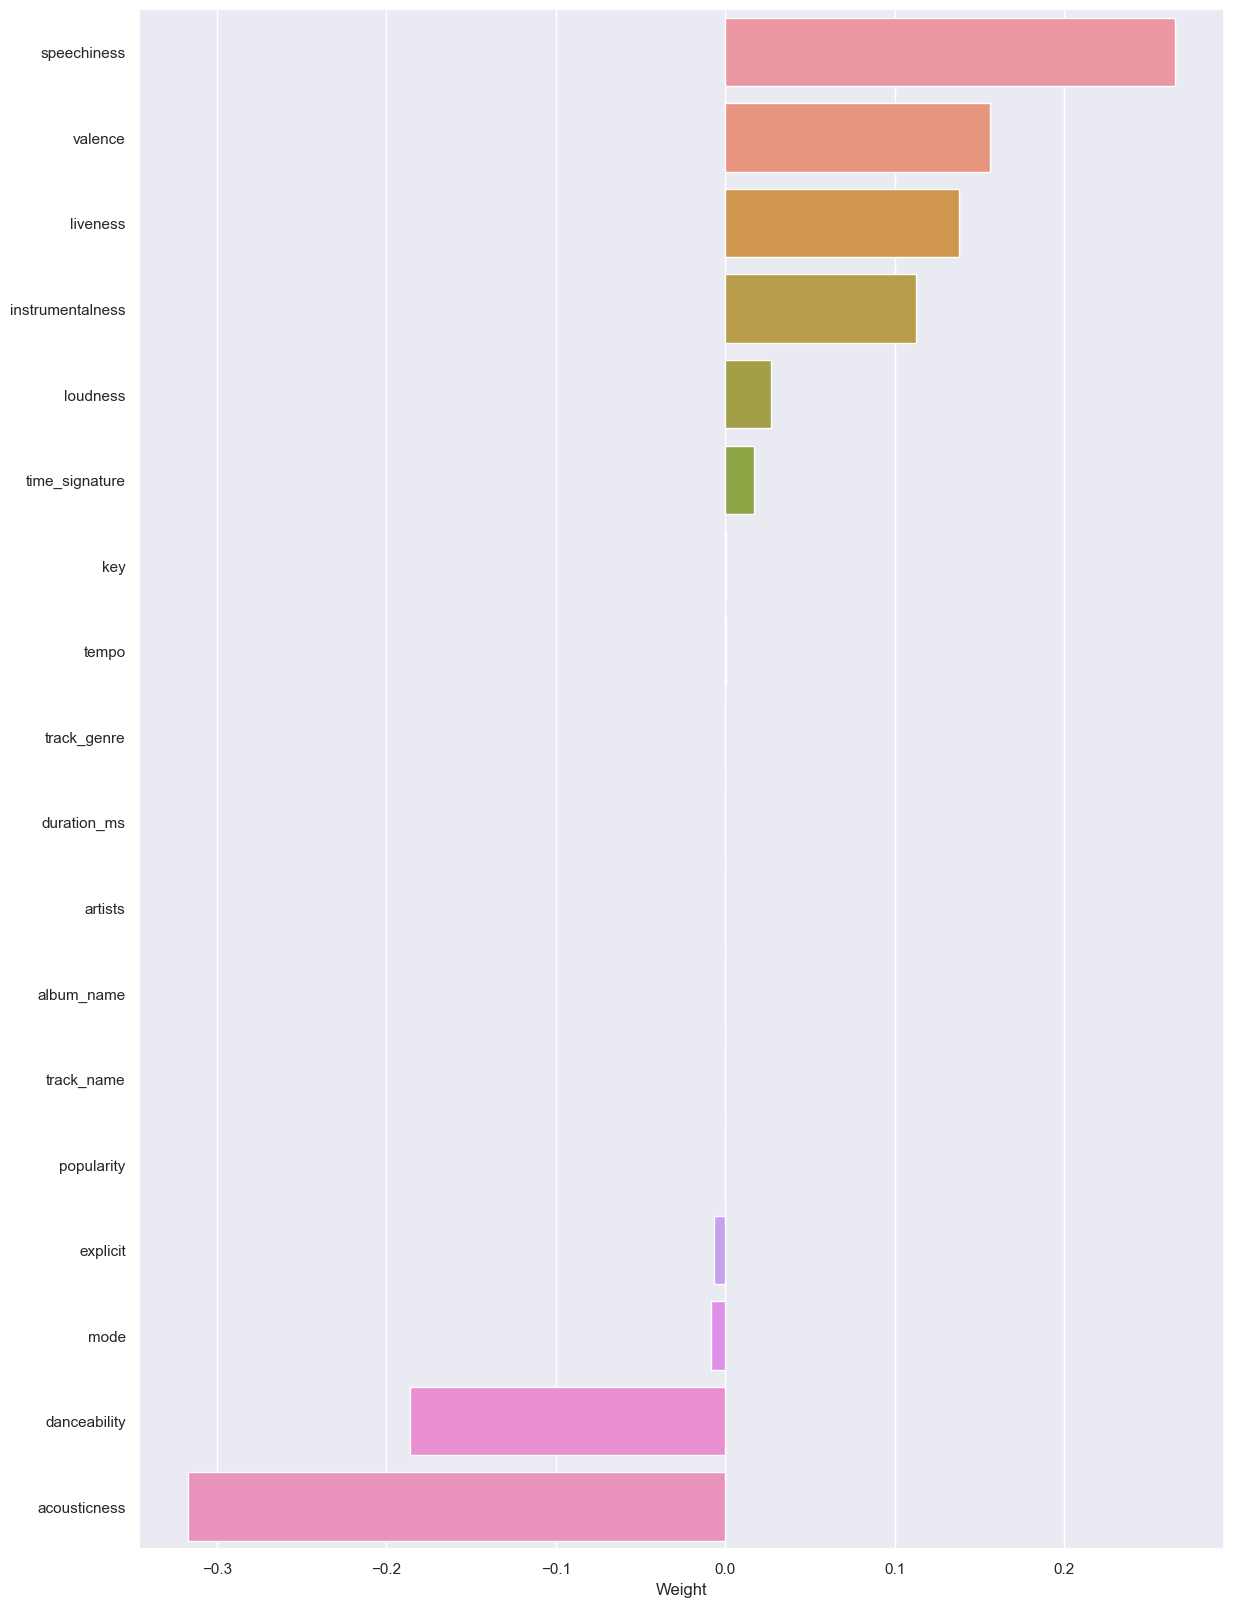

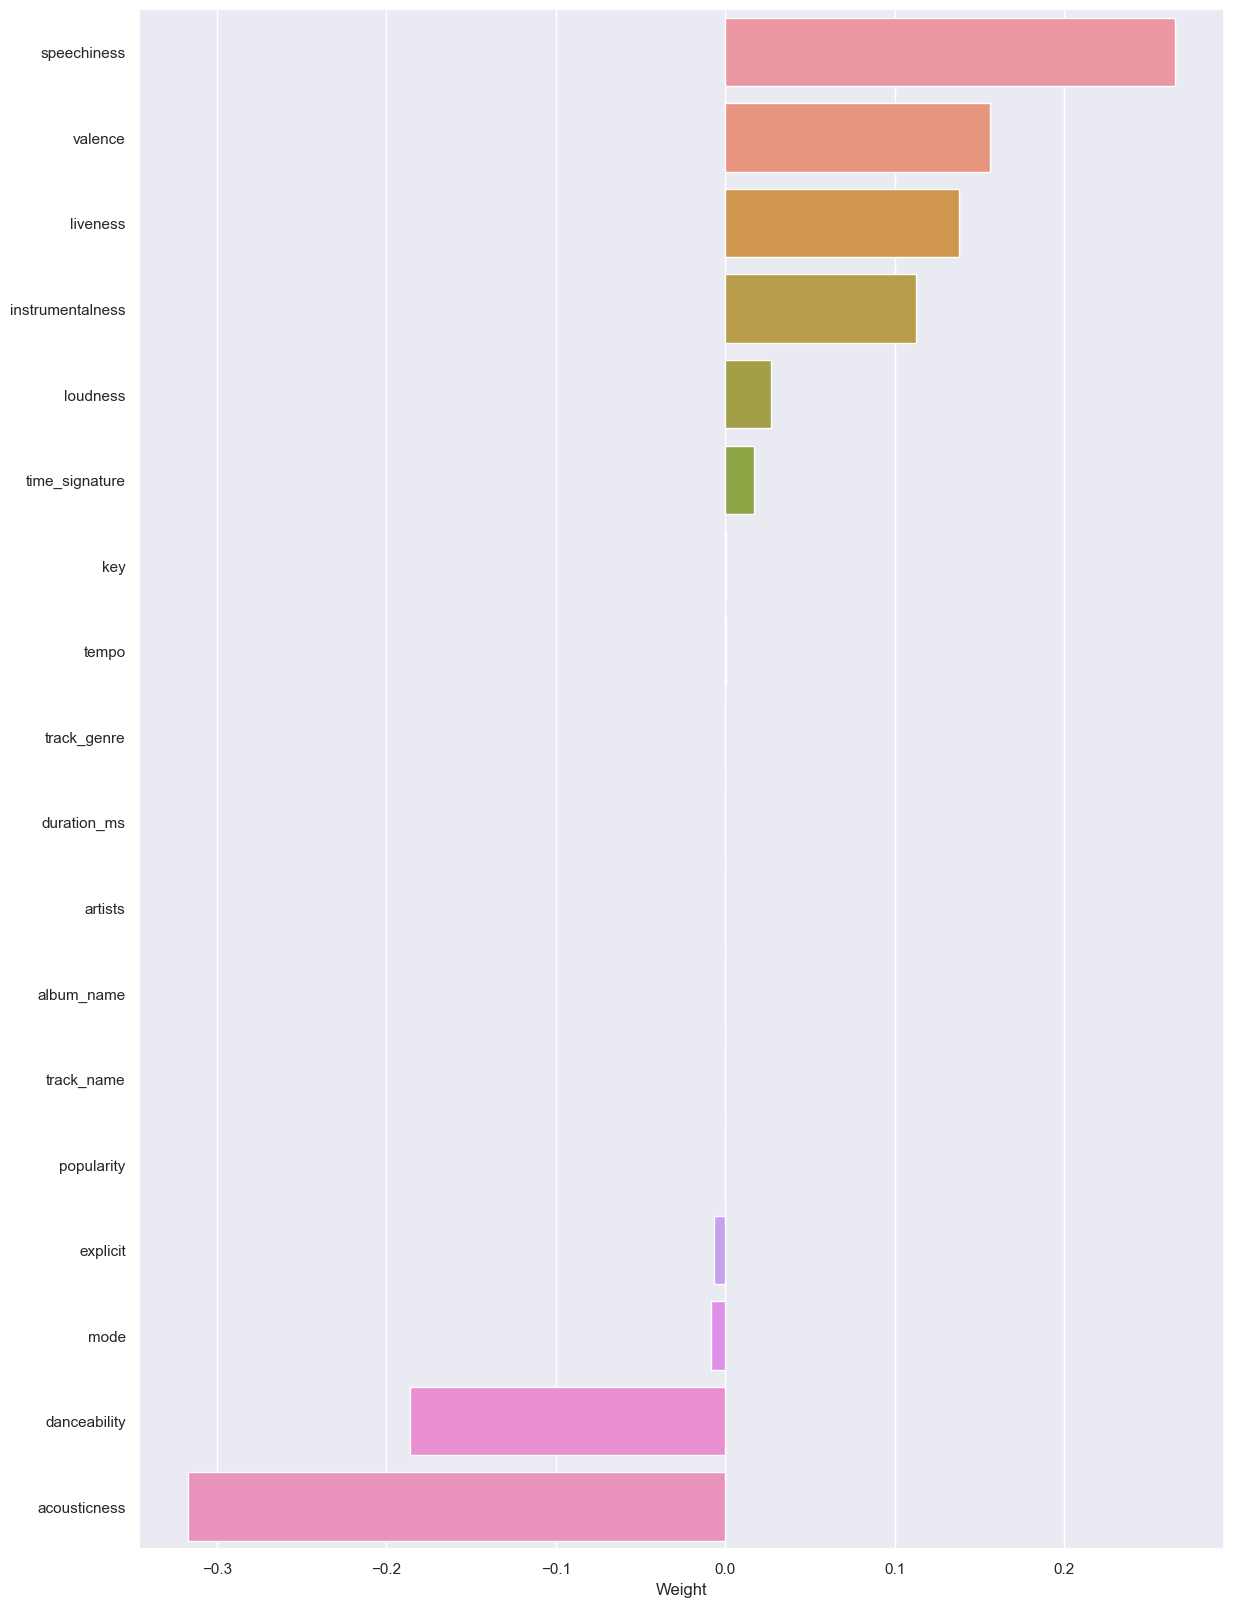

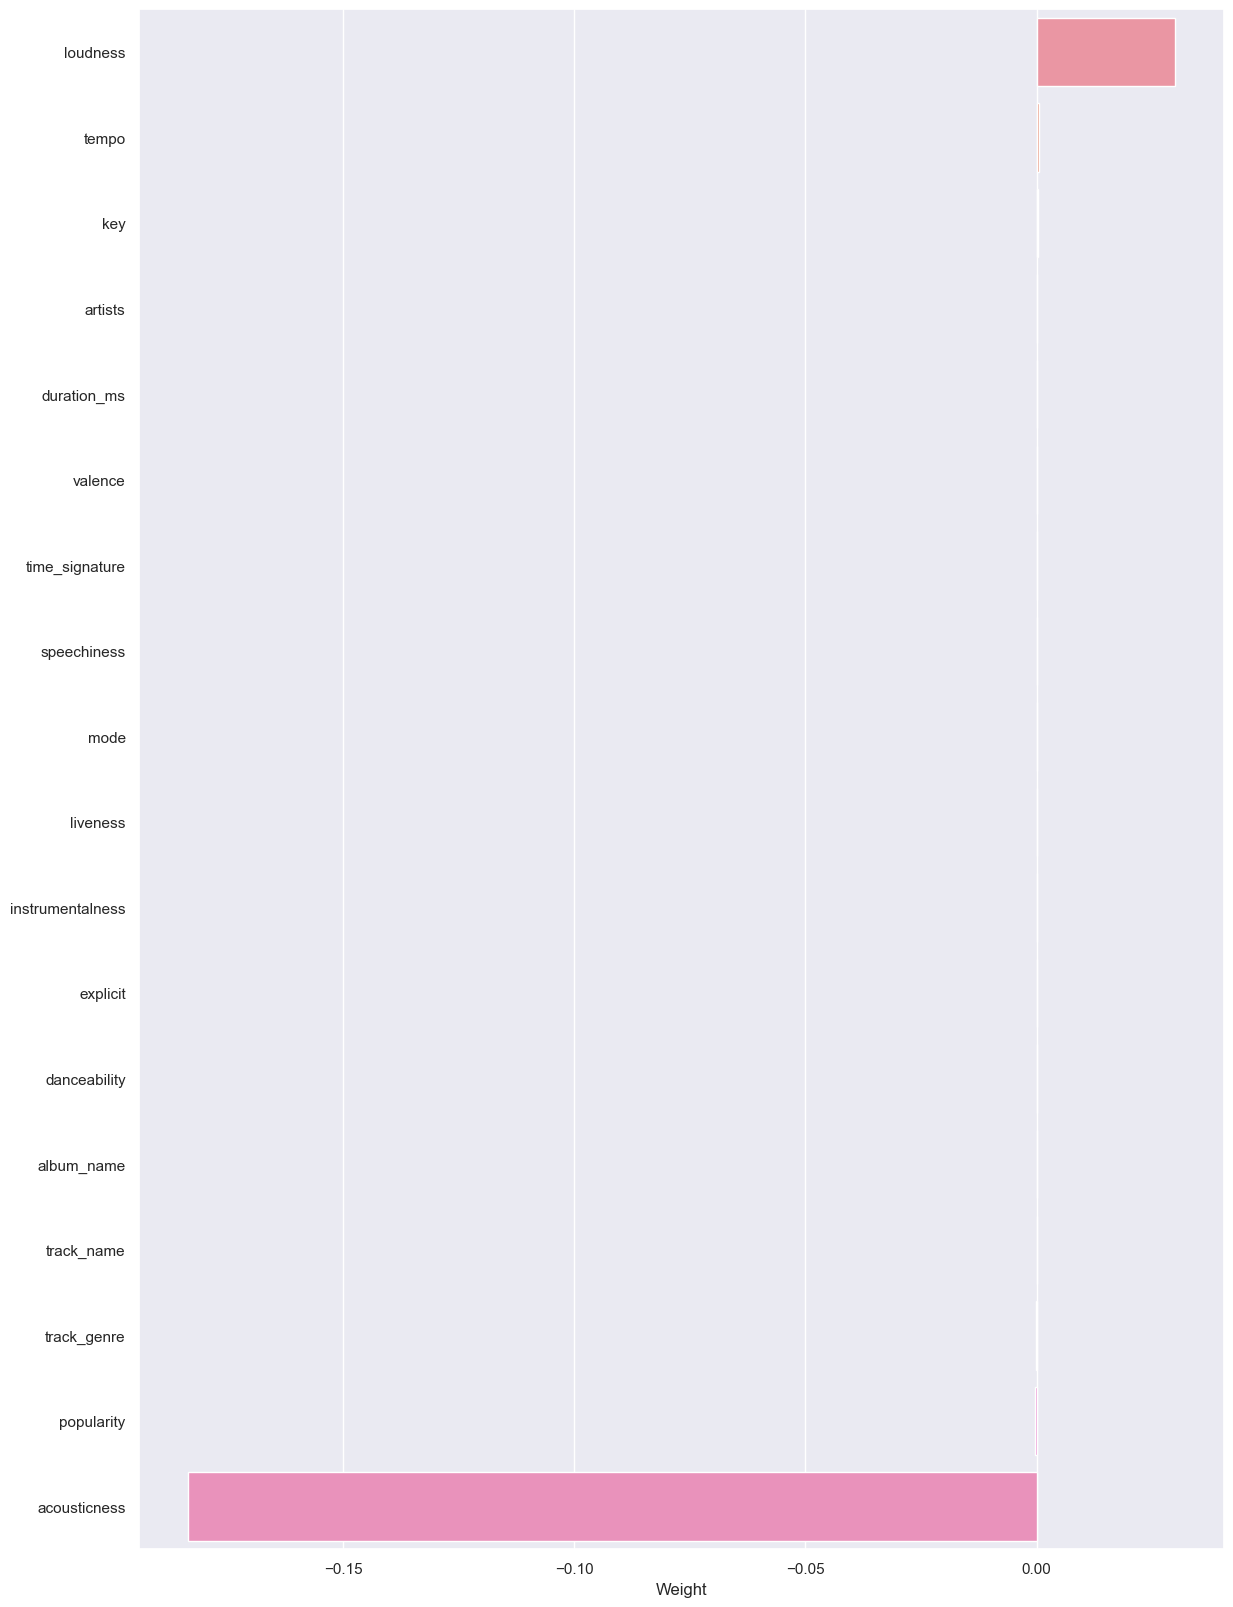

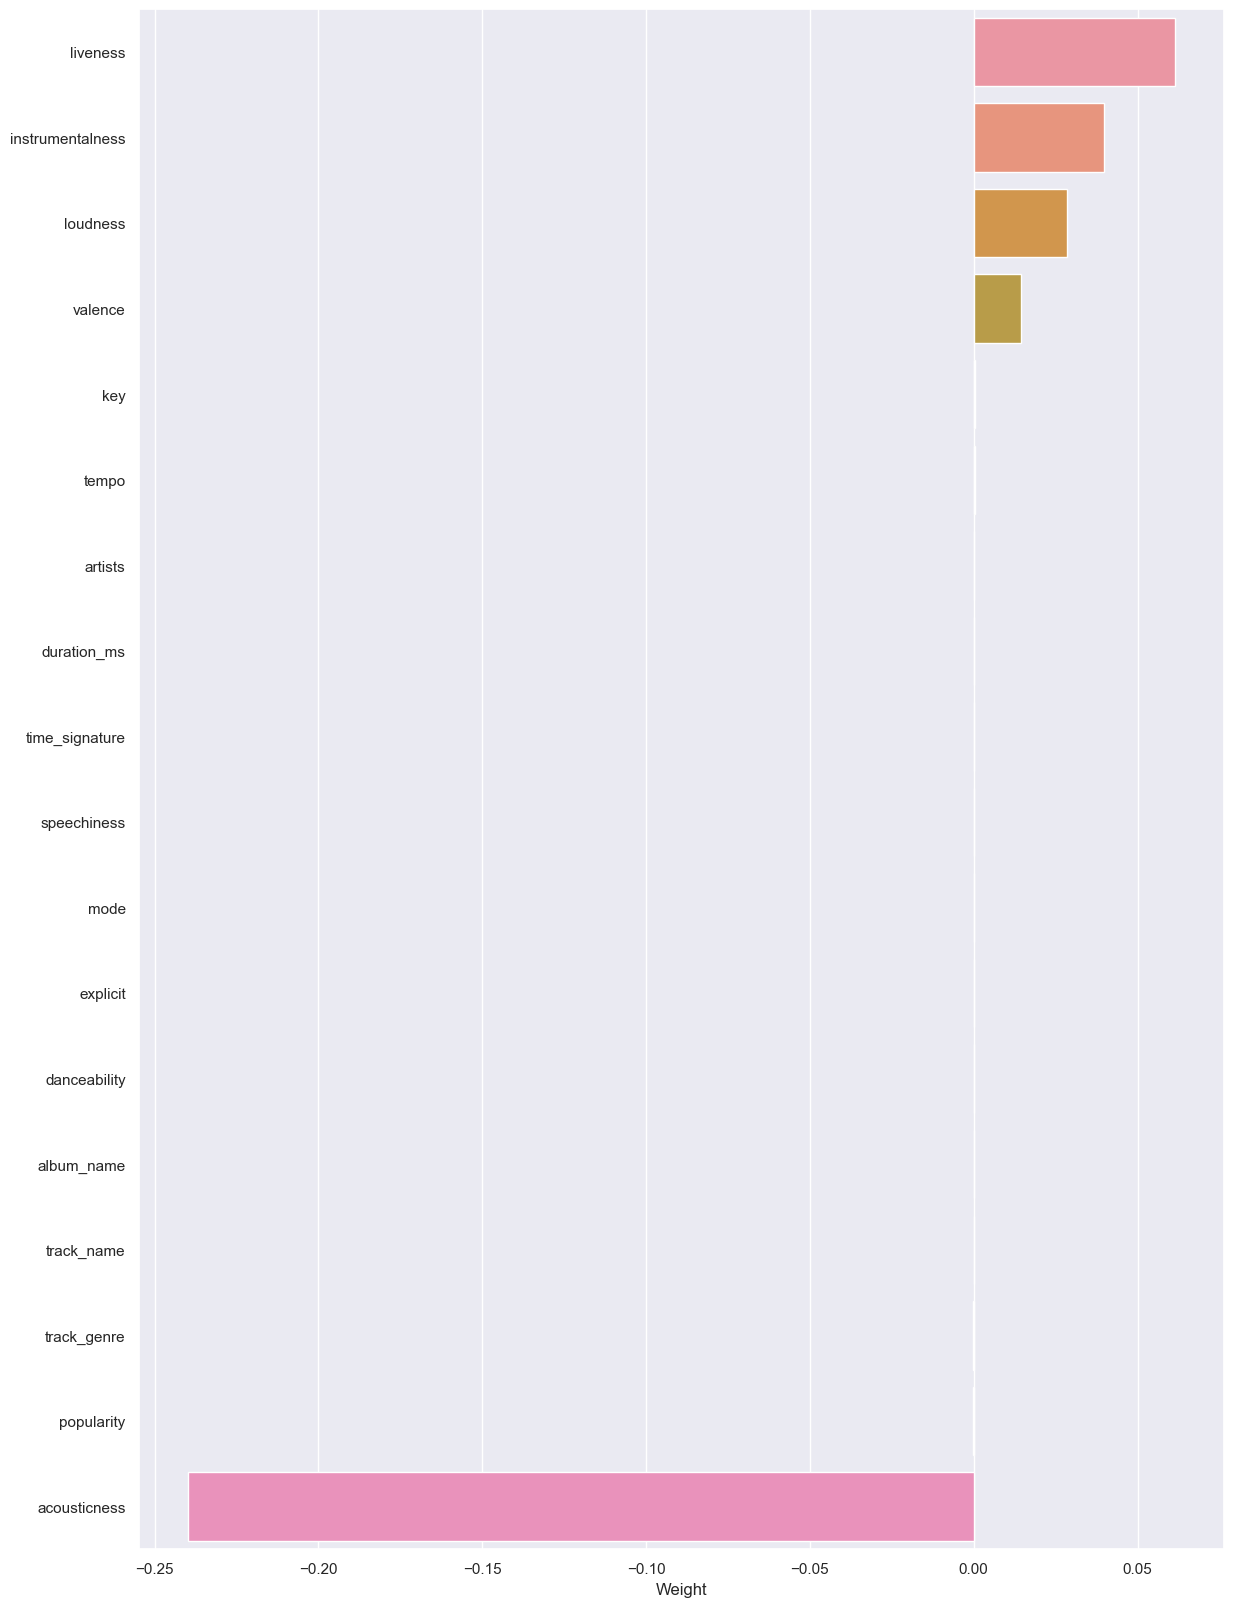

In [8]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

models = [regression_model, ridge_model, lasso_model, elastic_model]
model_names = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet']

def show_weights(model, features):
    fig, axs = plt.subplots(figsize=(14, 20), ncols=1)
    sorted_weights = sorted(zip(model.coef_, features), reverse=True)
    weights = [x[0] for x in sorted_weights]
    features = [x[1] for x in sorted_weights]
    sns.barplot(y=features, x=weights, ax=axs)
    axs.set_xlabel("Weight")
    plt.show()

X_train_columns = X_train.columns

for model, model_name in zip(models, model_names):
    show_weights(model, X_train_columns)

#### 5. [1 point] Implement one of the feature selection algorithms (Elimination by P-value, Forward elimination, Backward elimination), draw conclusions.

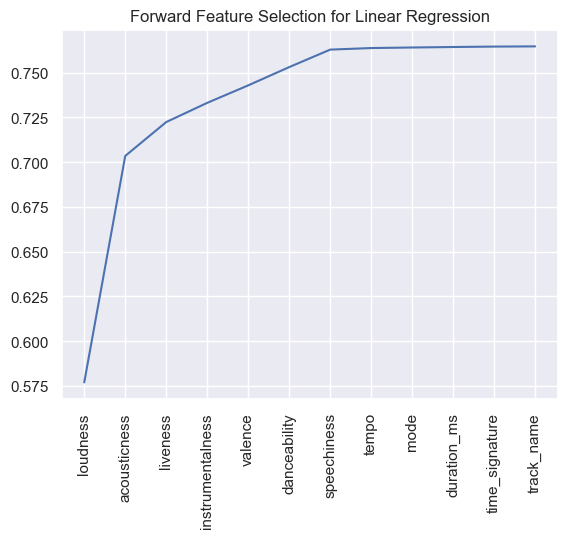

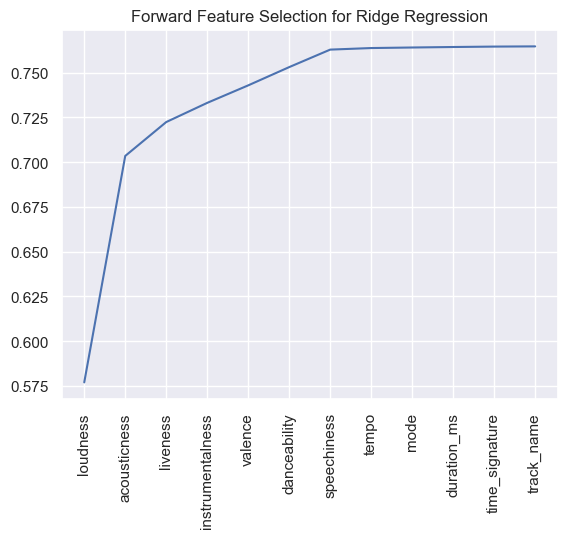

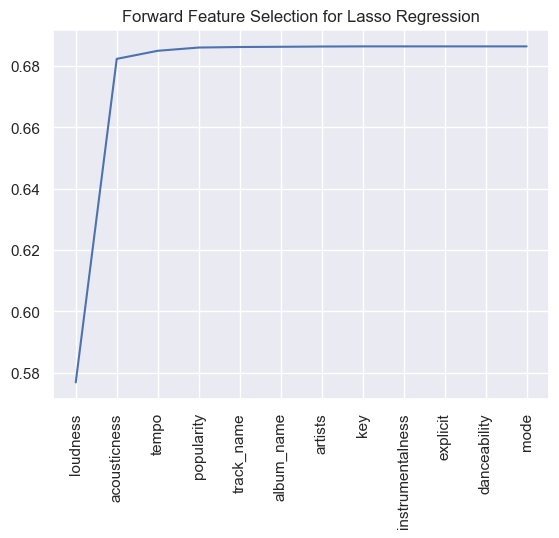

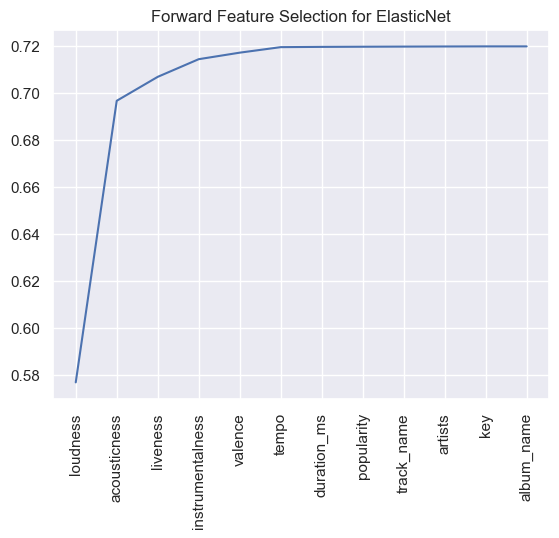

In [9]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def forward_feature_selection(model_class, train_data, ans_data, test_data, test_ans, model_args, evaluation_metric=r2_score, num_features_to_select=12):
    model = model_class(**model_args)
    features = train_data.columns.tolist()
    selected_features = []
    evaluation_scores = []
    feature_used = [False] * len(features)

    while len(selected_features) < len(features) and len(selected_features) < num_features_to_select:
        best_feature_index = None
        best_feature_score = 0

        for feature_index, is_used in enumerate(feature_used):
            if not is_used:
                current_feature = features[feature_index]
                current_test_features = selected_features + [current_feature]
                current_train_dataset = train_data[current_test_features]
                current_test_dataset = test_data[current_test_features]
                model.fit(current_train_dataset, ans_data)
                current_evaluation_score = evaluation_metric(test_ans, model.predict(current_test_dataset))

                if best_feature_index is None or current_evaluation_score > best_feature_score:
                    best_feature_index = feature_index
                    best_feature_score = current_evaluation_score

        feature_used[best_feature_index] = True
        selected_features.append(features[best_feature_index])
        evaluation_scores.append(best_feature_score)

    return evaluation_scores, selected_features

# Forward Feature Selection for Linear Regression
scores, features = forward_feature_selection(LinearRegression, X_train, y_train, X_test, y_test, model_args={})
plt.plot(features, scores)
plt.xticks(rotation=90)
plt.title("Forward Feature Selection for Linear Regression")
plt.show()

# Forward Feature Selection for Ridge Regression
scores, features = forward_feature_selection(Ridge, X_train, y_train, X_test, y_test, model_args={'alpha': 0.01})
plt.plot(features, scores)
plt.xticks(rotation=90)
plt.title("Forward Feature Selection for Ridge Regression")
plt.show()

# Forward Feature Selection for Lasso Regression
scores, features = forward_feature_selection(Lasso, X_train, y_train, X_test, y_test, model_args={'alpha': 0.01})
plt.plot(features, scores)
plt.xticks(rotation=90)
plt.title("Forward Feature Selection for Lasso Regression")
plt.show()

# Forward Feature Selection for ElasticNet
scores, features = forward_feature_selection(ElasticNet, X_train, y_train, X_test, y_test, model_args={'alpha': 0.01, 'l1_ratio': 0.4})
plt.plot(features, scores)
plt.xticks(rotation=90)
plt.title("Forward Feature Selection for ElasticNet")
plt.show()


#### 6. [1 point] Find the best (RMSE) $\alpha$ for Lasso regression using 4-fold cross-validation. You should choose a value from the logarithmic range $[10^{-4}, 10^{3}]$.

Best alpha = 0.0001


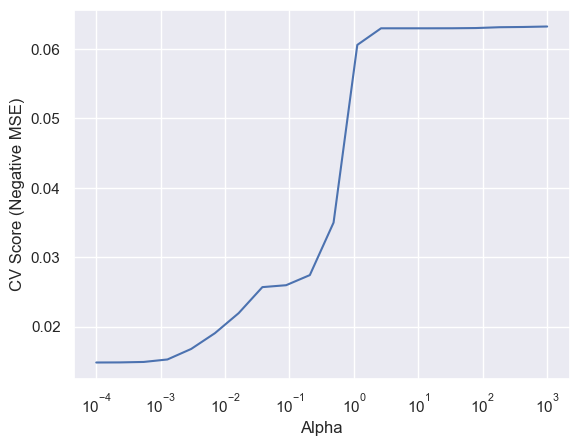

In [10]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
alphas = np.logspace(-4, 3, num=20)

param_grid = {'alpha': alphas}
lasso_regression = GridSearchCV(Lasso(), param_grid, scoring='neg_mean_squared_error', cv=4)
lasso_regression.fit(X_train, y_train)

best_alpha = lasso_regression.best_params_["alpha"]
print("Best alpha =", best_alpha)

plt.plot(alphas, -lasso_regression.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("CV Score (Negative MSE)")
plt.show()

## Gradient Descent

#### 7. [3.5 points] Implement Ridge regression for MSE loss trained using gradient descent.

All computations must be vectorized, and Python loops can only be used for gradient descent iterations. The stopping criteria must be (simultaneously):

* checking the absolute norm of the difference in weights on two adjacent iterations (e.g., less than some small number of the order of $10^{-6}$, specified by the `tolerance` parameter);

* reaching the maximum number of iterations (e.g., 10000, specified by the `max_iter` parameter).

You need to do:

* Full gradient descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

* Stochastic Gradient Descent:

$$
w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} q_{i_{k}}(w_{k}).
$$

$\nabla_{w} q_{i_{k}}(w_{k}) \, $ is an estimate of the gradient over a set of objects chosen at random.

* Moment of method:

$$
h_0 = 0, \\
h_{k + 1} = \alpha h_{k} + \eta_k \nabla_{w} Q(w_{k}), \\
w_{k + 1} = w_{k} - h_{k + 1}.
$$

* Adagrad method:

$$
G_0 = 0, \\
G_{k + 1} = G_{k} + (\nabla_{w} Q(w_{k+1}))^2, \\
w_{k + 1} = w_{k} - \eta * \frac{\nabla_{w} Q(w_{k+1})}{\sqrt{G_{k+1} + \epsilon}}.
$$

To verify that the optimization process is actually running, we will use the `loss_history` class attribute. After calling the fit method, it should contain the loss function values ​​for all iterations starting from the first (up to the first step along the antigradient).

You need to initialize the weights with a random vector from a normal distribution. Below is a template that should contain code implementing all the model variants.

In [15]:
import numpy as np
from sklearn.base import BaseEstimator

class LinReg(BaseEstimator):
    def __init__(self, delta=1.0, gd_type='Momentum',
                 tolerance=1e-4, max_iter=1000, w0=None, eta=1e-2, alpha=1e-3):
        """
        gd_type: str
            'GradientDescent', 'StochasticDescent', 'Momentum', 'Adagrad'
        delta: float
            proportion of object in a batch (for stochastic GD)
        tolerance: float
            for stopping gradient descent
        max_iter: int
            maximum number of steps in gradient descent
        w0: np.array of shape (d)
            init weights
        eta: float
            learning rate
        alpha: float
            momentum coefficient
        """
        self.delta = delta
        self.gd_type = gd_type
        self.tolerance = tolerance
        self.max_iter = max_iter
        self.w0 = w0
        self.alpha = alpha
        self.w = None
        self.eta = eta
        self.loss_history = []  # list of loss function values at each training iteration

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = self.w0 if self.w0 is not None else np.random.randn(n_features)

        for i in range(self.max_iter):
            if self.gd_type == 'GradientDescent':
                self._batch_gradient_descent(X, y)
            elif self.gd_type == 'StochasticDescent':
                self._stochastic_gradient_descent(X, y)
            elif self.gd_type == 'Momentum':
                self._momentum_descent(X, y)
            elif self.gd_type == 'Adagrad':
                self._adagrad(X, y)

            loss = self.calc_loss(X, y)
            self.loss_history.append(loss)

            if len(self.loss_history) > 1 and np.abs(self.loss_history[-2] - self.loss_history[-1]) < self.tolerance:
                break

        return self

    def predict(self, X):
        if self.w is None:
            raise Exception('Not trained yet')
        return X.dot(self.w)

    def calc_gradient(self, X, y):
        predictions = X.dot(self.w)
        error = predictions - y
        gradient = (2 / len(y)) * X.T.dot(error)
        return gradient

    def calc_loss(self, X, y):
        predictions = X.dot(self.w)
        error = predictions - y
        loss = np.mean(error ** 2)
        return loss

    def _batch_gradient_descent(self, X, y):
        gradient = self.calc_gradient(X, y)
        self.w -= self.eta * gradient

    def _stochastic_gradient_descent(self, X, y):
        n_samples = len(y)
        batch_size = int(self.delta * n_samples)

        indices = np.random.choice(n_samples, batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y[indices]

        gradient = self.calc_gradient(X_batch, y_batch)
        self.w -= self.eta * gradient

    def _momentum_descent(self, X, y):
        velocity = np.zeros_like(self.w)
        for i in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            velocity = self.alpha * velocity + self.eta * gradient
            self.w -= velocity

    def _adagrad(self, X, y, epsilon=1e-8):
        G = np.zeros_like(self.w)
        for i in range(self.max_iter):
            gradient = self.calc_gradient(X, y)
            G += gradient ** 2
            adjusted_eta = self.eta / (np.sqrt(G) + epsilon)
            self.w -= adjusted_eta * gradient


In [16]:
from sklearn.model_selection import train_test_split


model = LinReg(gd_type='GradientDescent', eta=0.01, max_iter=1000)
model.fit(X_train, y_train)

# Предсказания
predictions = model.predict(X_test)

# Печать предсказаний и истории потерь
print(predictions)
print(model.loss_history)

[-0.01881101  0.05690858 -0.08241199 -0.04805655  0.18150186  0.0283315
 -0.09668264  0.05384202  0.13900193  0.01124139  0.1035251   0.05803335
  0.07356056  0.15839934 -0.0778983  -0.01104923  0.00572719  0.02148805
  0.09134928  0.04914262]
[2.658284535911979, 2.608240242316764, 2.5597242769112247, 2.5126899582025275, 2.4670920308486686, 2.422886622075586, 2.380031199426721, 2.3384845298042545, 2.2982066397625163, 2.25915877701526, 2.221303373119678, 2.184604007301156, 2.149025371383882, 2.1145332357934863, 2.081094416598915, 2.0486767435617694, 2.0172490291622793, 1.9867810385720606, 1.9572434605446873, 1.9286078791960193, 1.9008467466470733, 1.8739333565030556, 1.8478418181429965, 1.8225470317951913, 1.7980246643744215, 1.7742511260576648, 1.7512035475757066, 1.7288597581987752, 1.7071982643949675, 1.6861982291409, 1.6658394518646467, 1.6461023490016289, 1.6269679351447128, 1.6084178047703577, 1.5904341145231964, 1.5729995660419773, 1.556097389310318, 1.5397113265162303, 1.5238256

#### 8. [1 point] Train and validate "manual" models on the same data, compare the quality with models from Sklearn and StatsModels. Investigate the influence of the `max_iter` and `alpha` parameters on the optimization process. Does it meet your expectations?

In [17]:
# your code here
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Пример обучения с Momentum
manual_model = LinReg(gd_type='Momentum', max_iter=1000, alpha=0.9, eta=0.01)
manual_model.fit(X_train, y_train)

# Предсказания для тестового набора
y_pred_manual = manual_model.predict(X_test)

# Оценка качества модели (через MSE)
from sklearn.metrics import mean_squared_error
mse_manual = mean_squared_error(y_test, y_pred_manual)
print(f'MSE for manual model: {mse_manual}')

MSE for manual model: 0.8389850028698144


In [18]:
from sklearn.linear_model import Ridge

# Ridge регрессия из Sklearn
sklearn_model = Ridge(alpha=0.1, max_iter=1000)
sklearn_model.fit(X_train, y_train)

# Предсказания и оценка качества
y_pred_sklearn = sklearn_model.predict(X_test)
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
print(f'MSE for Sklearn model: {mse_sklearn}')

MSE for Sklearn model: 0.893639490164394


In [19]:
import statsmodels.api as sm

# Добавляем константу для модели
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# OLS регрессия из StatsModels
stats_model = sm.OLS(y_train, X_train_sm).fit()

# Предсказания и оценка качества
y_pred_stats = stats_model.predict(X_test_sm)
mse_stats = mean_squared_error(y_test, y_pred_stats)
print(f'MSE for StatsModels OLS: {mse_stats}')

MSE for StatsModels OLS: 0.8935353965395768


In [20]:
for max_iter in [100, 500, 1000, 5000]:
    manual_model = LinReg(gd_type='Momentum', max_iter=max_iter, alpha=0.9, eta=0.01)
    manual_model.fit(X_train, y_train)
    y_pred_manual = manual_model.predict(X_test)
    mse_manual = mean_squared_error(y_test, y_pred_manual)
    print(f'MSE for manual model with max_iter={max_iter}: {mse_manual}')


MSE for manual model with max_iter=100: 0.8389855160643744
MSE for manual model with max_iter=500: 0.8389850028698144
MSE for manual model with max_iter=1000: 0.8389850028698144
MSE for manual model with max_iter=5000: 0.8389850028698144


In [21]:
for alpha in [0.1, 0.5, 0.9, 0.99]:
    manual_model = LinReg(gd_type='Momentum', max_iter=1000, alpha=alpha, eta=0.01)
    manual_model.fit(X_train, y_train)
    y_pred_manual = manual_model.predict(X_test)
    mse_manual = mean_squared_error(y_test, y_pred_manual)
    print(f'MSE for manual model with alpha={alpha}: {mse_manual}')

MSE for manual model with alpha=0.1: 0.8389850028698147
MSE for manual model with alpha=0.5: 0.8389850028698144
MSE for manual model with alpha=0.9: 0.8389850028698144
MSE for manual model with alpha=0.99: 0.8389843566871427


Увеличение количества итераций влияет на сходимость модели только до определённого порога (500 итераций). Значение параметра импульса alpha не оказывает существенного влияния на модель, что может быть связано с хорошей сходимостью без осцилляций.

#### 9. [1 point] Plot graphs of the loss function values ​​as a function of the iteration number for all models (full gradient descent, stochastic gc, Momentum, and Adagrad). Draw conclusions about the convergence rate of various modifications of gradient descent.

Don't forget about what a *nice* graph should look like!

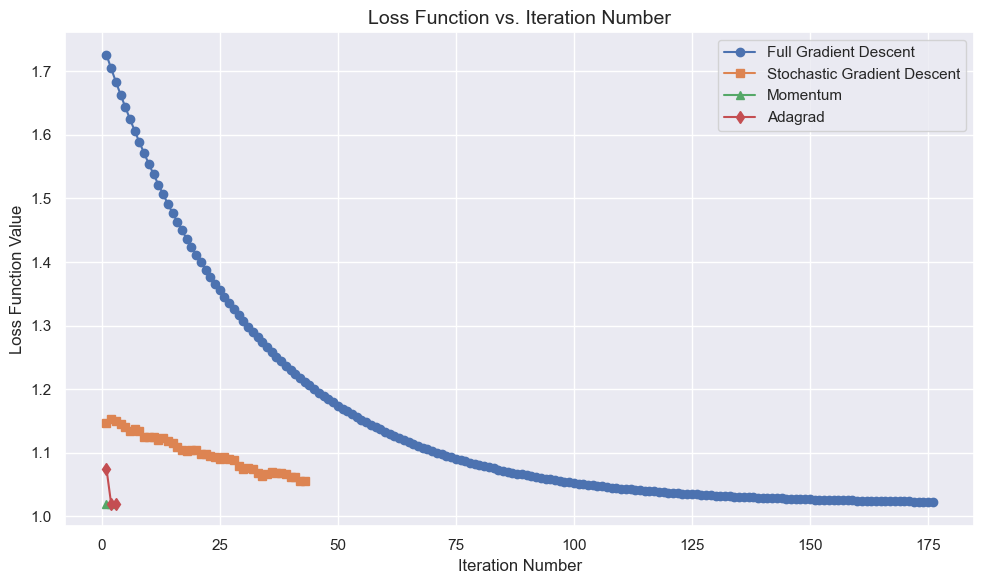

In [23]:
# Обучение модели для полного градиентного спуска
manual_model_full_gd = LinReg(gd_type='GradientDescent', max_iter=1000, eta=0.01)
manual_model_full_gd.fit(X_train, y_train)

# Обучение модели для стохастического градиентного спуска
manual_model_sgd = LinReg(gd_type='StochasticDescent', max_iter=1000, eta=0.01, delta=0.1)
manual_model_sgd.fit(X_train, y_train)

# Обучение модели для метода Momentum
manual_model_momentum = LinReg(gd_type='Momentum', max_iter=1000, alpha=0.9, eta=0.01)
manual_model_momentum.fit(X_train, y_train)

# Обучение модели для метода Adagrad
manual_model_adagrad = LinReg(gd_type='Adagrad', max_iter=1000, eta=0.01)
manual_model_adagrad.fit(X_train, y_train)

# Получение истории потерь для всех моделей
loss_history_full_gd = manual_model_full_gd.loss_history
loss_history_sgd = manual_model_sgd.loss_history
loss_history_momentum = manual_model_momentum.loss_history
loss_history_adagrad = manual_model_adagrad.loss_history

# Определение количества итераций
iterations_full_gd = list(range(1, len(loss_history_full_gd) + 1))
iterations_sgd = list(range(1, len(loss_history_sgd) + 1))
iterations_momentum = list(range(1, len(loss_history_momentum) + 1))
iterations_adagrad = list(range(1, len(loss_history_adagrad) + 1))

# Построение графика функции потерь
plt.figure(figsize=(10, 6))

plt.plot(iterations_full_gd, loss_history_full_gd, label="Full Gradient Descent", marker='o')
plt.plot(iterations_sgd, loss_history_sgd, label="Stochastic Gradient Descent", marker='s')
plt.plot(iterations_momentum, loss_history_momentum, label="Momentum", marker='^')
plt.plot(iterations_adagrad, loss_history_adagrad, label="Adagrad", marker='d')

plt.title("Loss Function vs. Iteration Number", fontsize=14)
plt.xlabel("Iteration Number", fontsize=12)
plt.ylabel("Loss Function Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()